# 作业六
编程如下数据聚类：双层正方形

# 导库与全局设置

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN

In [2]:
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 生成双层正方形数据

In [3]:
a = np.arange(1, 10, 0.01)
b = np.arange(3, 8, 0.01)
w = np.zeros((5600, 3))
# 外层正方形点
w[:900, 0] = a
w[:900, 1] = 1
w[900:1800, 0] = 1
w[900:1800, 1] = a
w[1800:2700, 0] = a
w[1800:2700, 1] = 10
w[2700:3600, 0] = 10
w[2700:3600, 1] = a
# 内层正方形点
w[3600:4100, 0] = b
w[3600:4100, 1] = 3
w[4100:4600, 0] = 3
w[4100:4600, 1] = b
w[4600:5100, 0] = b
w[4600:5100, 1] = 8
w[5100:, 0] = 8
w[5100:, 1] = b
w[3600:, 2] = 1

# K-Means 聚类

## 参数说明

n_clusters:聚类个数

random_state：控制参数随机性

In [4]:
cluster = KMeans(n_clusters=2, random_state=0)
y = cluster.fit_predict(w)

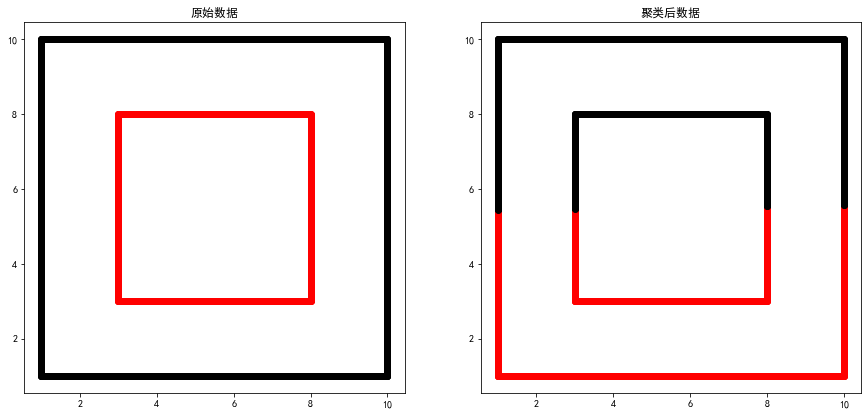

In [5]:
colors = ['black', 'red']
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
for i in range(len(w)):
    plt.scatter(w[i][0], w[i][1], color=colors[int(w[i][2])])
    plt.title("原始数据")
plt.subplot(2, 2, 2)
for i in range(len(y)):
    plt.scatter(w[i][0],  w[i][1], color=colors[y[i]])
    plt.title("聚类后数据")

# DBSCAN 聚类

## 参数说明

eps：ϵ-邻域的距离阈值，和样本距离超过ϵ的样本点不在ϵ-邻域内，默认值是0.5。

min_samples：形成高密度区域的最小点数。作为核心点的话邻域(即以其为圆心，eps为半径的圆，含圆上的点)中的最小样本数(包括点本身)。

若y=-1，则为异常点。

由于DBSCAN生成的类别不确定，因此定义一个函数用来筛选出符合指定类别的最合适的参数。

合适的标准是异常点个数最少。

In [6]:
# 筛选参数
def search_best_parameter(N_clusters, X):
    min_outliners = 999
    best_eps = 0
    best_min_samples = 0
    # 迭代不同的eps值
    for eps in np.arange(0.001, 1, 0.05):
        # 迭代不同的min_samples值
        for min_samples in range(2, 10):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            # 模型拟合
            y = dbscan.fit_predict(X)
            # 统计各参数组合下的聚类个数（-1表示异常点）
            if len(np.argwhere(y == -1)) == 0:
                n_clusters = len(np.unique(y))
            else:
                n_clusters = len(np.unique(y)) - 1
            # 异常点的个数
            outliners = len([i for i in y if i == -1])
            if outliners < min_outliners and n_clusters == N_clusters:
                min_outliners = outliners
                best_eps = eps
                best_min_samples = min_samples
    return best_eps, best_min_samples

In [7]:
eps, min_samples = search_best_parameter(2, w)
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y = dbscan.fit_predict(w)

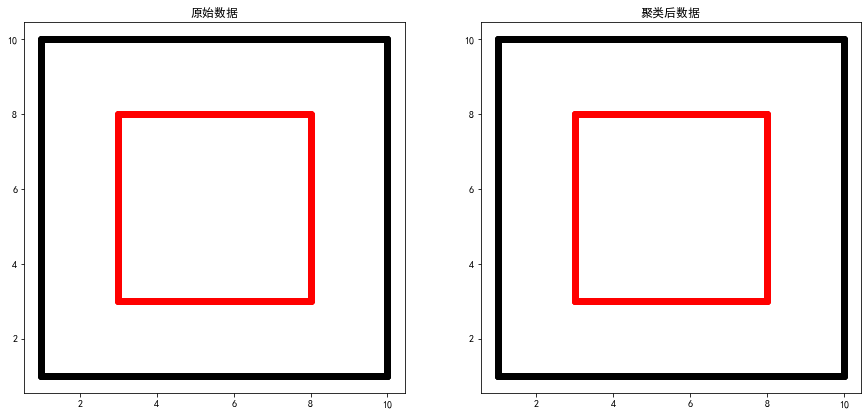

In [8]:
colors = ['black', 'red']
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
for i in range(len(w)):
    plt.scatter(w[i][0], w[i][1], color=colors[int(w[i][2])])
    plt.title("原始数据")
plt.subplot(2, 2, 2)
for i in range(len(y)):
    plt.scatter(w[i][0],  w[i][1], color=colors[y[i]])
    plt.title("聚类后数据")

# 总结
对于双层正方形数据来说，K-Means聚类方法不适合进行聚类，而采用DBSCAN方法可以取得较好的效果。